In [1]:
pwd

'/home/wsuser/work'

In [3]:
import pandas as pd
import numpy as np

In [5]:
!pip install keras==2.2.4
!pip install tensorflow

     |████████████████████████████████| 1.3 MB 17.6 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [8]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


##  Visualizing the Image Data

In [9]:
import matplotlib.pyplot as plt

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
single_image = x_train[0]

In [8]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
single_image.shape

(28, 28)

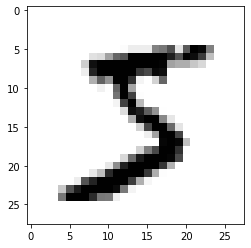

In [14]:
plt.imshow(single_image,cmap='binary')

# PreProcessing Data


## Labels

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_train.shape

(60000,)

In [19]:
y_example = to_categorical(y_train)

In [20]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [21]:
y_example.shape

(60000, 10)

In [22]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
y_cat_test = to_categorical(y_test,10)

In [24]:
y_cat_train = to_categorical(y_train,10)

### Processing X Data


In [25]:
single_image.max()

255

In [26]:
single_image.min()

0

In [27]:
x_train = x_train/255
x_test = x_test/255

In [28]:
scaled_single = x_train[0]

In [29]:
scaled_single.max()

1.0

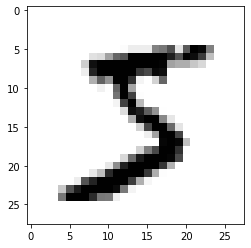

In [30]:
plt.imshow(scaled_single,cmap='binary')

## Reshaping the Data


In [31]:
x_train.shape

(60000, 28, 28)

In [32]:
x_test.shape

(10000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

In [33]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [34]:
x_train.shape

(60000, 28, 28, 1)

In [35]:
x_test = x_test.reshape(10000,28,28,1)

In [36]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [38]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Train the Model

In [43]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0090 - accuracy: 0.9970 - val_loss: 0.0492 - val_accuracy: 0.9873
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.0493 - val_accuracy: 0.9869
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0049 - accuracy: 0.9983 - val_loss: 0.0486 - val_accuracy: 0.9873
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0057 - accuracy: 0.9980 - val_loss: 0.0552 - val_accuracy: 0.9854
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0042 - accuracy: 0.9985 - val_loss: 0.0608 - val_accuracy: 0.9858


## Evaluate the Model

In [44]:
model.metrics_names

['loss', 'accuracy']

In [45]:
losses = pd.DataFrame(model.history.history)

In [49]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.008963,0.997000,0.049217,0.9873
1,0.007881,0.997367,0.049336,0.9869
2,0.004905,0.998300,0.048620,0.9873
3,0.005650,0.997967,0.055155,0.9854
4,0.004196,0.998533,0.060779,0.9858


<AxesSubplot:>

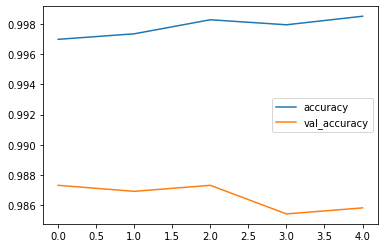

In [50]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

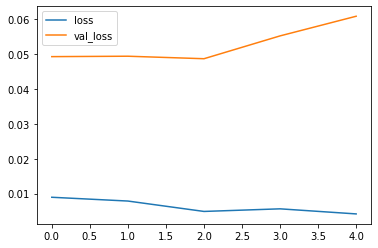

In [51]:
losses[['loss','val_loss']].plot()

In [52]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.06077907606959343, 0.98580002784729]


In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

In [56]:
y_cat_test.shape

(10000, 10)

In [57]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [59]:
predictions = model.predict(x_test)
predictions[0]

array([5.6329961e-15, 4.8939573e-15, 6.5178874e-14, 3.6133308e-11,
       3.2783841e-16, 3.8500252e-15, 3.6332046e-23, 1.0000000e+00,
       2.0880296e-12, 3.4418932e-10], dtype=float32)

In [60]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [61]:
import seaborn as sns

# Predicting a given image

In [62]:
my_number = x_test[0]

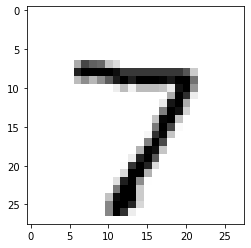

In [66]:
plt.imshow(my_number.reshape(28,28),cmap='binary')

In [68]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict(my_number.reshape(1,28,28,1))

array([[5.6329961e-15, 4.8939573e-15, 6.5179124e-14, 3.6133447e-11,
        3.2783841e-16, 3.8500252e-15, 3.6332046e-23, 1.0000000e+00,
        2.0880337e-12, 3.4418868e-10]], dtype=float32)

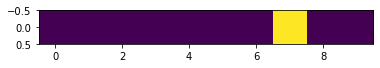

In [70]:
predict_x=model.predict(my_number.reshape(1,28,28,1)) 
classes_x=np.argmax(predict_x,axis=1)
plt.imshow(predict_x)

In [73]:
model.save('CNN-MNIST.h5')

In [74]:
!tar -zcvf CNN-MNIST.tgz CNN_MNIST.h5

tar: CNN_MNIST.h5: Cannot stat: No such file or directory
tar: Exiting with failure status due to previous errors


In [75]:
ls -l

total 6976
-rw-rw---- 1 wsuser wscommon 7135768 Nov 11 17:08 CNN-MNIST.h5
-rw-rw---- 1 wsuser wscommon      45 Nov 11 17:09 CNN-MNIST.tgz


In [76]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 12.9 MB/s eta 0:00:01


In [84]:
from ibm_watson_machine_learning import APIClient
uml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "zzJDRiaZV0T0gSYU7Un_vtScLyxWH7tZ50Pre4jj-Mzn"
}
client = APIClient(uml_credentials)

In [85]:
print(client)

In [86]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==space_name)['metadata']['id'])

In [87]:
space_uid = guid_from_space_name(client, 'cnnmodel')
print("Space_UID=" + space_uid)

StopIteration: 

In [82]:
client.software_specifications.list()

You must set the space/project id. Use `client.set.default_space(<SPACE_UID>)`/`client.set.default_project(<PROJECT_UID>)` to proceed.


WMLClientError: You must set the space/project id. Use `client.set.default_space(<SPACE_UID>)`/`client.set.default_project(<PROJECT_UID>)` to proceed.